In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("survey lung cancer.csv")
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [ ]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [ ]:
# Checking the counts of label categories
df.isin(['?','NA']).sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [ ]:
Total = df['LUNG_CANCER'].value_counts(normalize = True)
Total*100

YES    87.378641
NO     12.621359
Name: LUNG_CANCER, dtype: float64

## Data Visualization

In [ ]:
#sns.pairplot(data=df);

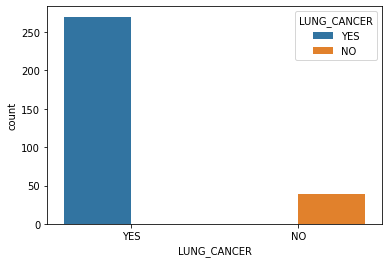

In [ ]:
sns.countplot(x='LUNG_CANCER',hue='LUNG_CANCER',data=df);

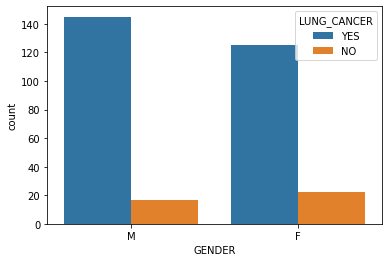

In [ ]:
sns.countplot(x='GENDER',hue='LUNG_CANCER',data=df);

# Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    if df[col].dtypes == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))

In [ ]:
df.corr()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
GENDER,1.000000,0.021306,0.036277,-0.212959,-0.152127,-0.275564,-0.204606,-0.083560,0.154251,0.141207,0.454268,0.133303,-0.064911,-0.078161,0.362958,0.067254
AGE,0.021306,1.000000,-0.084475,0.005205,0.053170,0.018685,-0.012642,0.012614,0.027990,0.055011,0.058985,0.169950,-0.017513,-0.001270,-0.018104,0.089465
SMOKING,0.036277,-0.084475,1.000000,-0.014585,0.160267,-0.042822,-0.141522,-0.029575,0.001913,-0.129426,-0.050623,-0.129471,0.061264,0.030718,0.120117,0.058179
YELLOW_FINGERS,-0.212959,0.005205,-0.014585,1.000000,0.565829,0.323083,0.041122,-0.118058,-0.144300,-0.078515,-0.289025,-0.012640,-0.105944,0.345904,-0.104829,0.181339
ANXIETY,-0.152127,0.053170,0.160267,0.565829,1.000000,0.216841,-0.009678,-0.188538,-0.165750,-0.191807,-0.165750,-0.225644,-0.144077,0.489403,-0.113634,0.144947
PEER_PRESSURE,-0.275564,0.018685,-0.042822,0.323083,0.216841,1.000000,0.048515,0.078148,-0.081800,-0.068771,-0.159973,-0.089019,-0.220175,0.366590,-0.094828,0.186388
CHRONIC DISEASE,-0.204606,-0.012642,-0.141522,0.041122,-0.009678,0.048515,1.000000,-0.110529,0.106386,-0.049967,0.002150,-0.175287,-0.026459,0.075176,-0.036938,0.110891
FATIGUE,-0.083560,0.012614,-0.029575,-0.118058,-0.188538,0.078148,-0.110529,1.000000,0.003056,0.141937,-0.191377,0.146856,0.441745,-0.132790,-0.010832,0.150673
ALLERGY,0.154251,0.027990,0.001913,-0.144300,-0.165750,-0.081800,0.106386,0.003056,1.000000,0.173867,0.344339,0.189524,-0.030056,-0.061508,0.239433,0.327766
WHEEZING,0.141207,0.055011,-0.129426,-0.078515,-0.191807,-0.068771,-0.049967,0.141937,0.173867,1.000000,0.265659,0.374265,0.037834,0.069027,0.147640,0.249300


# Model Preparation
Spilt into X & Y

In [ ]:
x = df.drop("LUNG_CANCER",axis=1)
y = df["LUNG_CANCER"]

In [ ]:
x

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,1,1,1,2,2,2,1,1,2,2,2,2,1
305,1,70,2,1,1,1,1,2,2,2,2,2,2,1,2
306,1,58,2,1,1,1,1,1,2,2,2,2,1,1,2
307,1,67,2,1,2,1,1,2,2,1,2,2,2,1,2


In [ ]:
y

0      1
1      1
2      0
3      0
4      0
      ..
304    1
305    1
306    1
307    1
308    1
Name: LUNG_CANCER, Length: 309, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
#step1-: initialise the model
ann = Sequential()

#step2 -: add the hidden layers
ann.add(Dense(units=4, activation="relu"))
ann.add(Dense(units=1, activation="sigmoid"))

#step3 -: establish the connection
ann.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

#step4 -: train the model
ann.fit(xtrain, ytrain, batch_size=30, epochs=100)

#step5 -: make prediction
ypred = ann.predict(xtest)

#step6 -: set the threshold
ypred = ypred>0.5

Epoch 1/100
8/8 [==============================] - 0s 3ms/step - loss: 0.9418 - accuracy: 0.2269
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 0.9151 - accuracy: 0.2407
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 0.8907 - accuracy: 0.2546
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 0.8667 - accuracy: 0.2639
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 0.8443 - accuracy: 0.3056
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.8232 - accuracy: 0.3380
Epoch 7/100
8/8 [==============================] - 0s 2ms/step - loss: 0.8024 - accuracy: 0.3565
Epoch 8/100
8/8 [==============================] - 0s 2ms/step - loss: 0.7834 - accuracy: 0.3796
Epoch 9/100
8/8 [==============================] - 0s 2ms/step - loss: 0.7650 - accuracy: 0.4120
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 0.7478 - accuracy: 0.4444
Epoch 11/100
8/8 [===========

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.87      0.99      0.92        81

    accuracy                           0.86        93
   macro avg       0.43      0.49      0.46        93
weighted avg       0.76      0.86      0.81        93

